In [ ]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.inspection import permutation_importance
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

In [2]:
data_analysis = pd.read_csv('data_processed.csv')
data_analysis

,Gender,GenderCode,Age,Height,Weight,HeartRate,BodyTemp,ExerciseNameENG,ExerciseNameUKR,ExerciseID,Duration,Calories
0,male,0,68,190,94,105,40.8,"Cycling, 16-19 mph, very fast, racing","Велоспорт, 25-30 км/год, дуже швидко",13,29,231
1,female,1,20,166,60,94,40.3,"Stationary cycling, light","Стаціонарний велоспорт, легкий режим",24,14,66
2,male,0,69,179,79,88,38.7,Watering lawn or garden,Полив газону або саду,22,5,26
3,female,1,34,179,71,100,40.5,Unicycling,Їзда на одноколісному велосипеді,17,13,71
4,female,1,27,154,58,81,39.8,"Stationary cycling, very light","Стаціонарний велоспорт, дуже легкий режим",23,10,35
...,...,...,...,...,...,...,...,...,...,...,...,...
14995,female,1,20,193,86,92,40.4,Mild stretching,Легка розтяжка,19,11,45
14996,female,1,27,165,65,85,39.2,Watering lawn or garden,Полив газону або саду,22,6,23
14997,female,1,43,159,58,90,40.1,Walking 4.5 mph,"Ходьба, 7 км/год, дуже швидкий темп",33,16,75
14998,male,0,78,193,97,84,38.3,Watering lawn or garden,Полив газону або саду,22,2,11


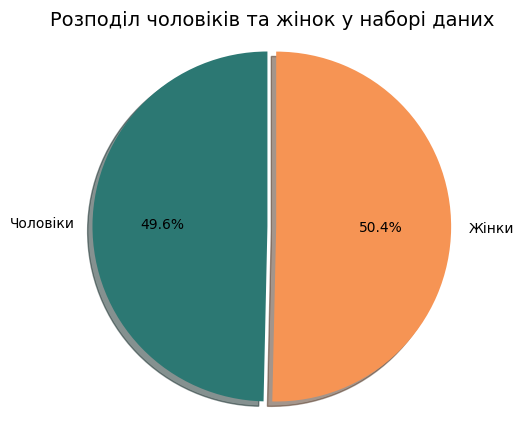

In [3]:
explode = (0, 0.05)
sizes = [data_analysis.GenderCode[data_analysis['GenderCode']==0].count(), data_analysis.GenderCode[data_analysis['GenderCode']==1].count()]
labels = 'Чоловіки', 'Жінки'
figure1, ax1 = plt.subplots(figsize=(5, 5))
colors = ['#2C7873', '#F69454']  
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90, colors=colors)
ax1.axis('equal') 
plt.title("Розподіл чоловіків та жінок у наборі даних", size=14)
plt.show()

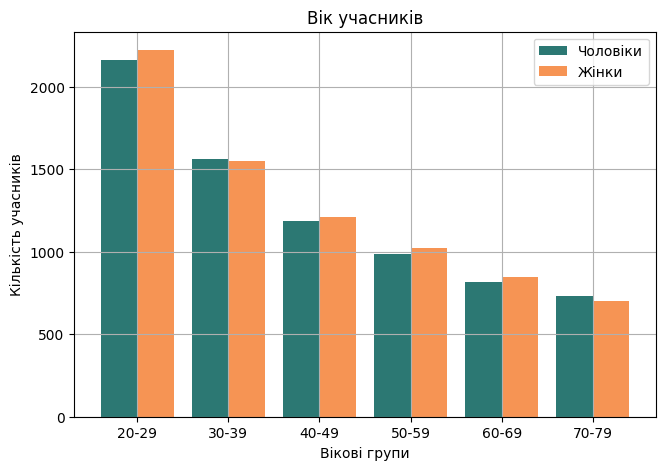

In [4]:
male = data_analysis[data_analysis['GenderCode'] == 0]
female = data_analysis[data_analysis['GenderCode'] == 1]

bins = np.arange(20, 90, 10)

plt.figure(figsize=(7.5, 5))
plt.hist([male['Age'], female['Age']], bins=bins, color=['#2C7873', '#F69454'], label=['Чоловіки', 'Жінки'], align='left')
plt.xlabel('Вікові групи')
plt.ylabel('Кількість учасників')
plt.title('Вік учасників')
plt.xticks(bins[:-1], [f'{i}-{i+9}' for i in bins[:-1]])
plt.legend()
plt.grid(True)
plt.show()

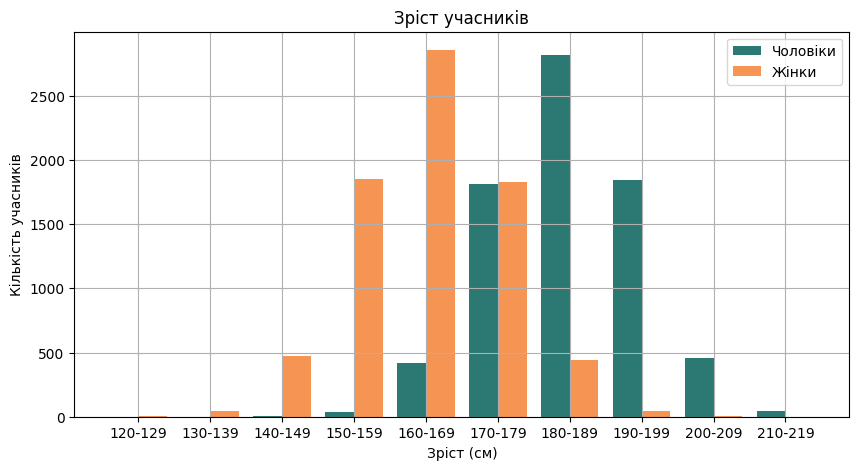

In [5]:
bins = np.arange(120, 230, 10)

plt.figure(figsize=(10, 5))
plt.hist([male['Height'], female['Height']], bins=bins, color=['#2C7873', '#F69454'], label=['Чоловіки', 'Жінки'], align='left')
plt.xlabel('Зріст (см)')
plt.ylabel('Кількість учасників')
plt.title('Зріст учасників')
plt.xticks(bins[:-1], [f'{i}-{i+9}' for i in bins[:-1]]) 
plt.legend()
plt.grid(True)
plt.show()

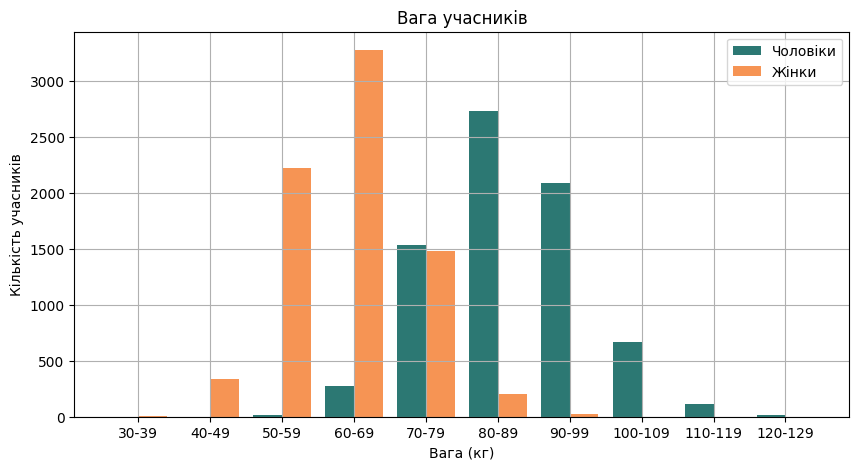

In [6]:
bins = np.arange(30, 140, 10)

plt.figure(figsize=(10, 5))
plt.hist([male['Weight'], female['Weight']], bins=bins, color=['#2C7873', '#F69454'], label=['Чоловіки', 'Жінки'], align='left')
plt.xlabel('Вага (кг)')
plt.ylabel('Кількість учасників')
plt.title('Вага учасників')
plt.xticks(bins[:-1], [f'{i}-{i+9}' for i in bins[:-1]]) 
plt.legend()
plt.grid(True)
plt.show()

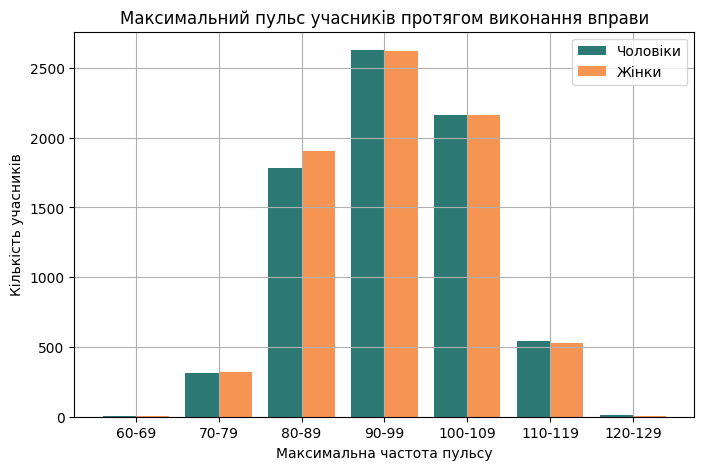

In [7]:
bins = np.arange(60, 140, 10)

plt.figure(figsize=(8, 5))
plt.hist([male['HeartRate'], female['HeartRate']], bins=bins, color=['#2C7873', '#F69454'], label=['Чоловіки', 'Жінки'], align='left')
plt.xlabel('Максимальна частота пульсу')
plt.ylabel('Кількість учасників')
plt.title('Максимальний пульс учасників протягом виконання вправи')
plt.xticks(bins[:-1], [f'{i}-{i+9}' for i in bins[:-1]]) 
plt.legend()
plt.grid(True)
plt.show()

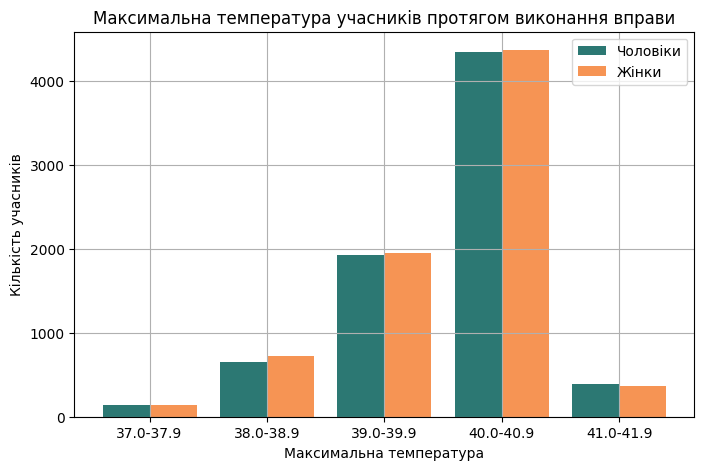

In [8]:
bins = np.arange(37.0, 43.0, 1.0)

plt.figure(figsize=(8, 5))
plt.hist([male['BodyTemp'], female['BodyTemp']], bins=bins, color=['#2C7873', '#F69454'], label=['Чоловіки', 'Жінки'], align='left')
plt.xlabel('Максимальна температура')
plt.ylabel('Кількість учасників')
plt.title('Максимальна температура учасників протягом виконання вправи')
plt.xticks(bins[:-1], [f'{i}-{i+0.9}' for i in bins[:-1]]) 
plt.legend()
plt.grid(True)
plt.show()

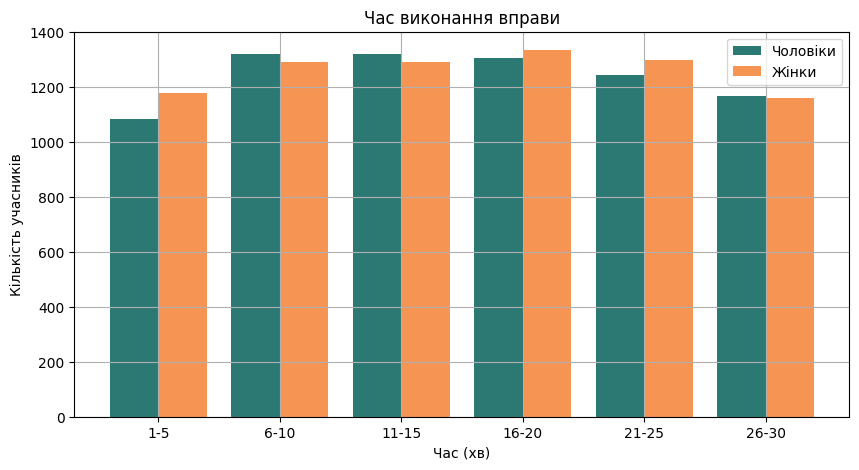

In [9]:
bins = np.arange(1, 35, 5)

plt.figure(figsize=(10, 5))
plt.hist([male['Duration'], female['Duration']], bins=bins, color=['#2C7873', '#F69454'], label=['Чоловіки', 'Жінки'], align='left')
plt.xlabel('Час (хв)')
plt.ylabel('Кількість учасників')
plt.title('Час виконання вправи')
plt.xticks(bins[:-1], [f'{i}-{i+4}' for i in bins[:-1]]) 
plt.legend()
plt.grid(True)
plt.show()

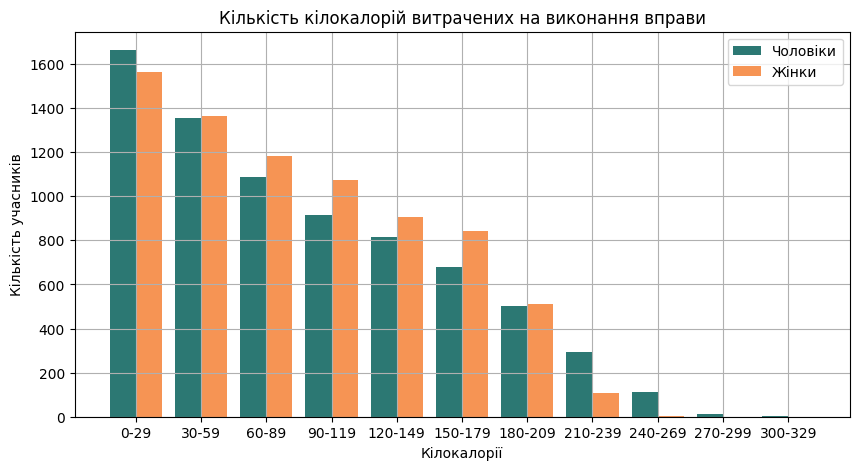

In [10]:
bins = np.arange(0, 360, 30)

plt.figure(figsize=(10, 5))
plt.hist([male['Calories'], female['Calories']], bins=bins, color=['#2C7873', '#F69454'], label=['Чоловіки', 'Жінки'], align='left')
plt.xlabel('Кілокалорії')
plt.ylabel('Кількість учасників')
plt.title('Кількість кілокалорій витрачених на виконання вправи')
plt.xticks(bins[:-1], [f'{i}-{i+29}' for i in bins[:-1]]) 
plt.legend()
plt.grid(True)
plt.show()

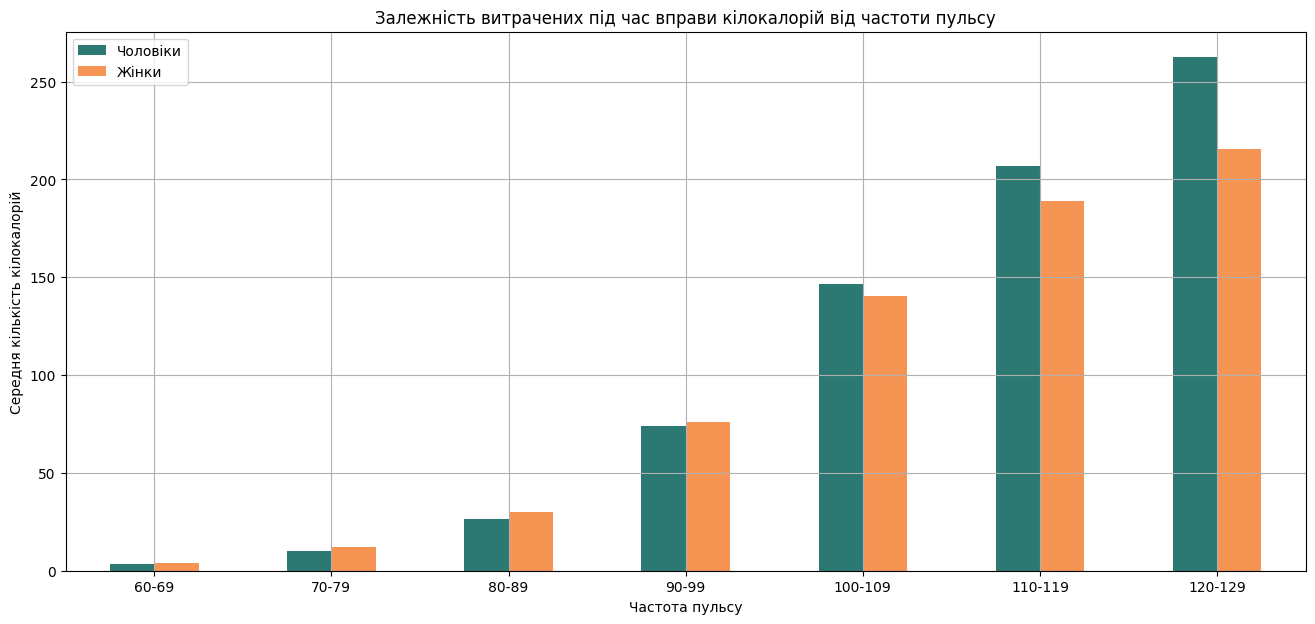

In [11]:
bins = np.arange(60, 140, 10)
labels = [f'{i}-{i+9}' for i in bins[:-1]]

data_analysis['HeartRateGroup'] = np.digitize(data_analysis['HeartRate'], bins)
average_calories_by_heartrate = data_analysis.groupby(['HeartRateGroup', 'GenderCode'])['Calories'].mean().unstack()

average_calories_by_heartrate.plot(kind='bar', figsize=(16, 7), ax=plt.gca(), color=['#2C7873', '#F69454'])
plt.xlabel('Частота пульсу')
plt.ylabel('Середня кількість кілокалорій')
plt.title('Залежність витрачених під час вправи кілокалорій від частоти пульсу')
plt.legend(['Чоловіки', 'Жінки'])
plt.grid(True)
plt.xticks(ticks=np.arange(len(labels)), labels=labels, rotation=0)
plt.show()

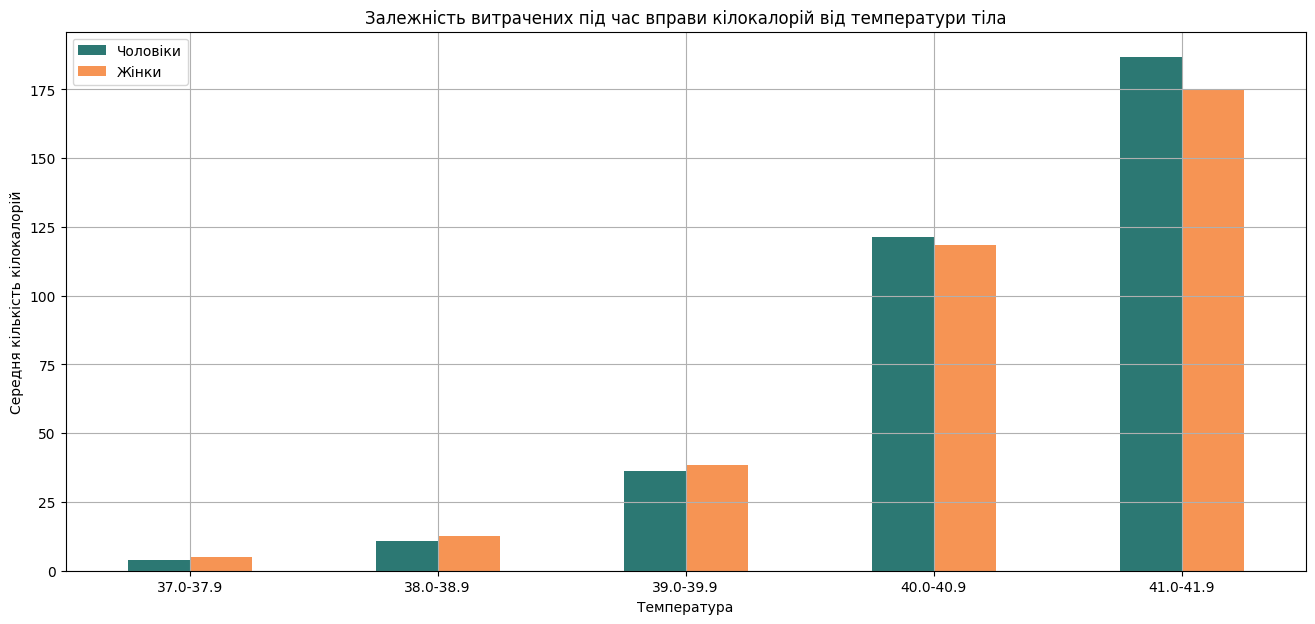

In [12]:
bins = np.arange(37.0, 43.0, 1.0)
labels = [f'{i}-{i+0.9}' for i in bins[:-1]]

data_analysis['TemperatureGroup'] = np.digitize(data_analysis['BodyTemp'], bins)
average_calories_by_temperature = data_analysis.groupby(['TemperatureGroup', 'GenderCode'])['Calories'].mean().unstack()

average_calories_by_temperature.plot(kind='bar', figsize=(16, 7), ax=plt.gca(), color=['#2C7873', '#F69454'])
plt.xlabel('Температура')
plt.ylabel('Середня кількість кілокалорій')
plt.title('Залежність витрачених під час вправи кілокалорій від температури тіла')
plt.legend(['Чоловіки', 'Жінки'], loc='upper left')
plt.grid(True)
plt.xticks(ticks=np.arange(len(labels)), labels=labels, rotation=0)
plt.show()

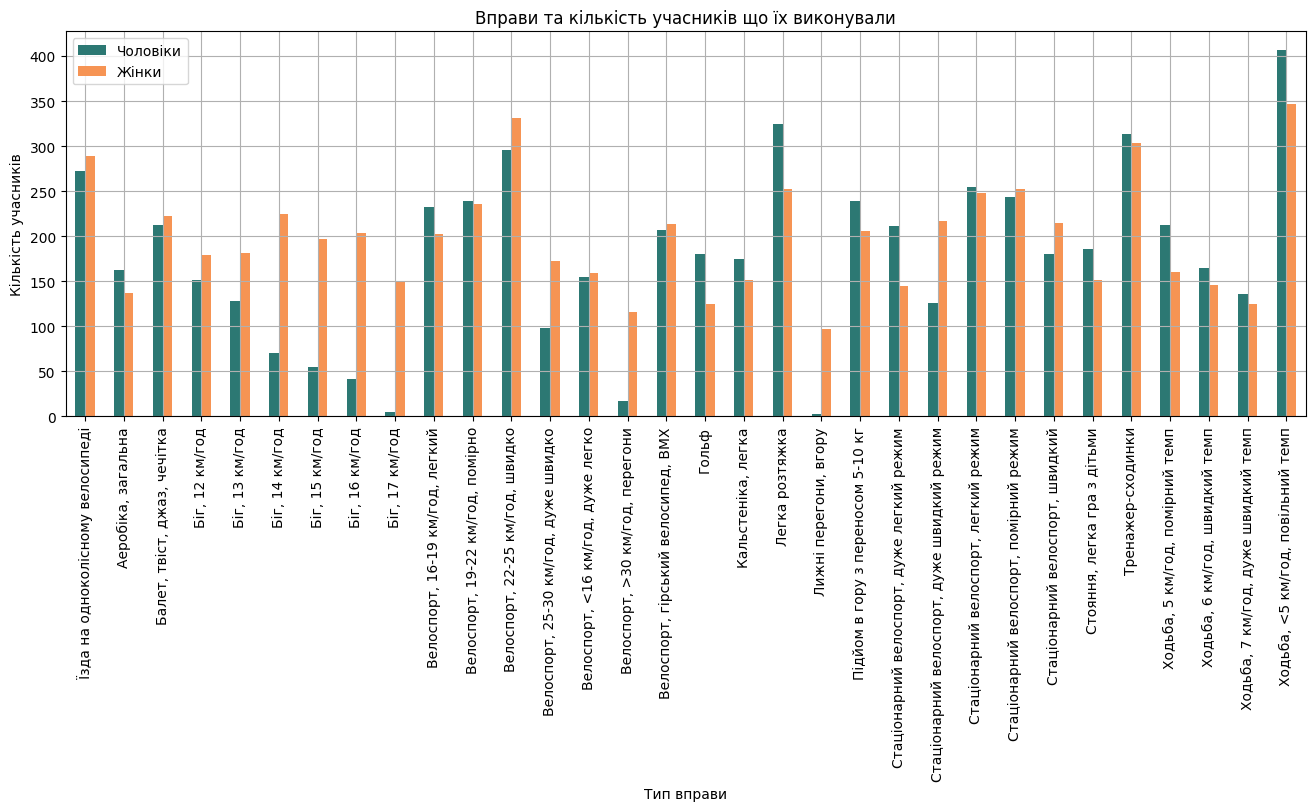

In [13]:
data_filtered = data_analysis[data_analysis['ExerciseNameUKR'] != 'Полив газону або саду']

people_counts_by_exercise = data_filtered.groupby(['ExerciseNameUKR', 'GenderCode']).size().unstack(fill_value=0)

people_counts_by_exercise.plot(kind='bar', figsize=(16, 5), ax=plt.gca(), color=['#2C7873', '#F69454'])
plt.xlabel('Тип вправи')
plt.ylabel('Кількість учасників')
plt.title('Вправи та кількість учасників що їх виконували')
plt.legend(['Чоловіки', 'Жінки'])
plt.grid(True)
plt.xticks(rotation=90)
plt.show()

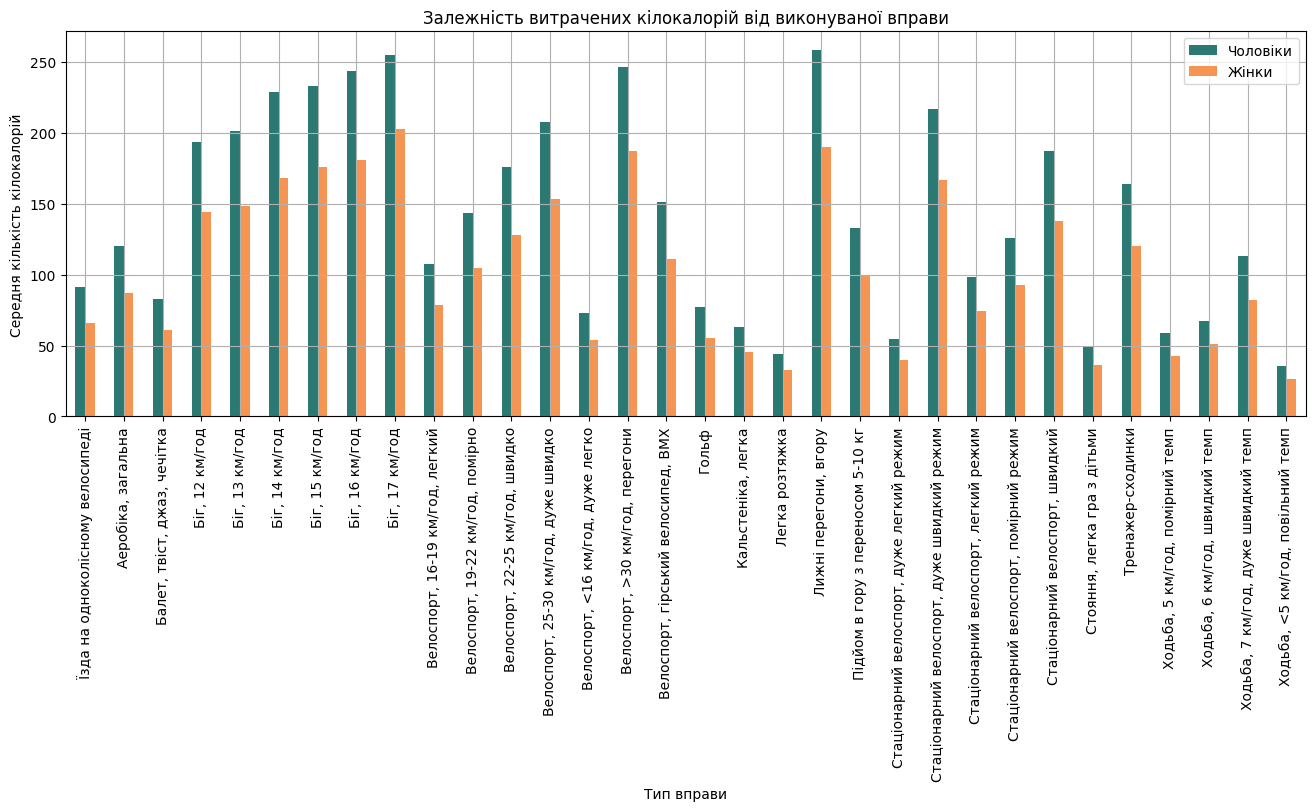

In [14]:
average_calories_by_exercise = data_filtered.groupby(['ExerciseNameUKR', 'GenderCode'])['Calories'].mean().unstack()

average_calories_by_exercise.plot(kind='bar', figsize=(16, 5), ax=plt.gca(), color=['#2C7873', '#F69454'])
plt.xlabel('Тип вправи')
plt.ylabel('Середня кількість кілокалорій')
plt.title('Залежність витрачених кілокалорій від виконуваної вправи')
plt.legend(['Чоловіки', 'Жінки'])
plt.grid(True)
plt.xticks(rotation=90)
plt.show()

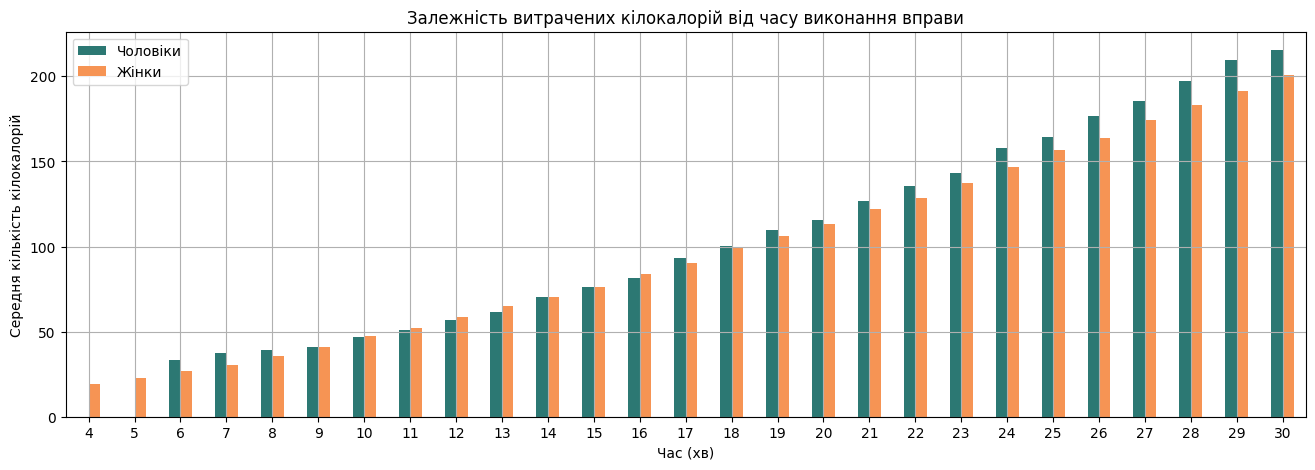

In [15]:
average_calories_by_duration = data_filtered.groupby(['Duration', 'GenderCode'])['Calories'].mean().unstack()

average_calories_by_duration.plot(kind='bar', figsize=(16, 5), ax=plt.gca(), color=['#2C7873', '#F69454'])
plt.xlabel('Час (хв)')
plt.ylabel('Середня кількість кілокалорій')
plt.title('Залежність витрачених кілокалорій від часу виконання вправи')
plt.legend(['Чоловіки', 'Жінки'])
plt.grid(True)
plt.xticks(rotation=0)
plt.show()

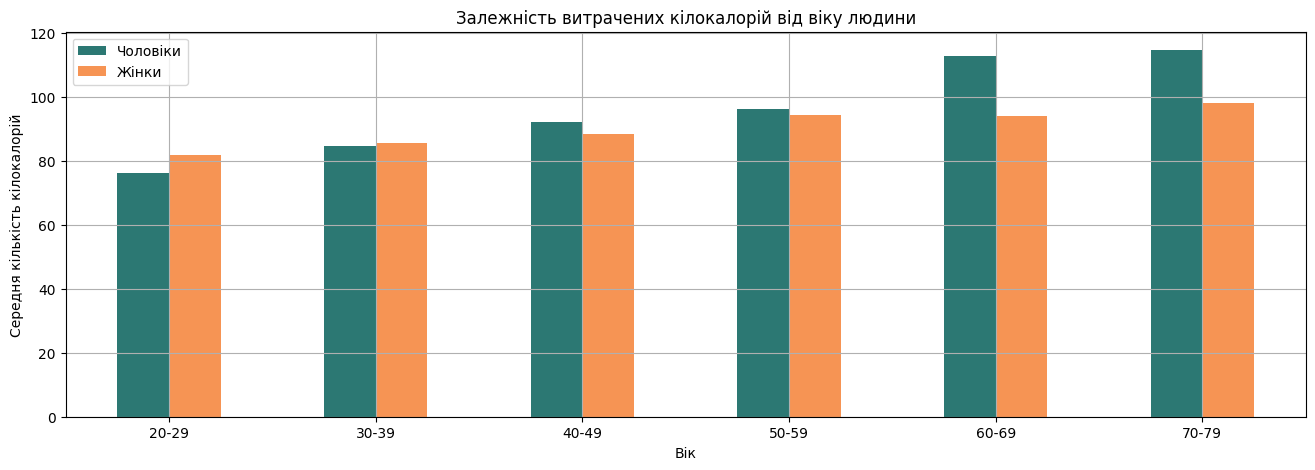

In [16]:
bins = np.arange(20, 90, 10)
labels = [f'{i}-{i+9}' for i in bins[:-1]]

data_analysis['AgeGroup'] = np.digitize(data_analysis['Age'], bins)
average_calories_by_age = data_analysis.groupby(['AgeGroup', 'GenderCode'])['Calories'].mean().unstack()

average_calories_by_age.plot(kind='bar', figsize=(16, 5), ax=plt.gca(), color=['#2C7873', '#F69454'])
plt.xlabel('Вік')
plt.ylabel('Середня кількість кілокалорій')
plt.title('Залежність витрачених кілокалорій від віку людини')
plt.legend(['Чоловіки', 'Жінки'])
plt.grid(True)
plt.xticks(ticks=np.arange(len(labels)), labels=labels, rotation=0)
plt.show()

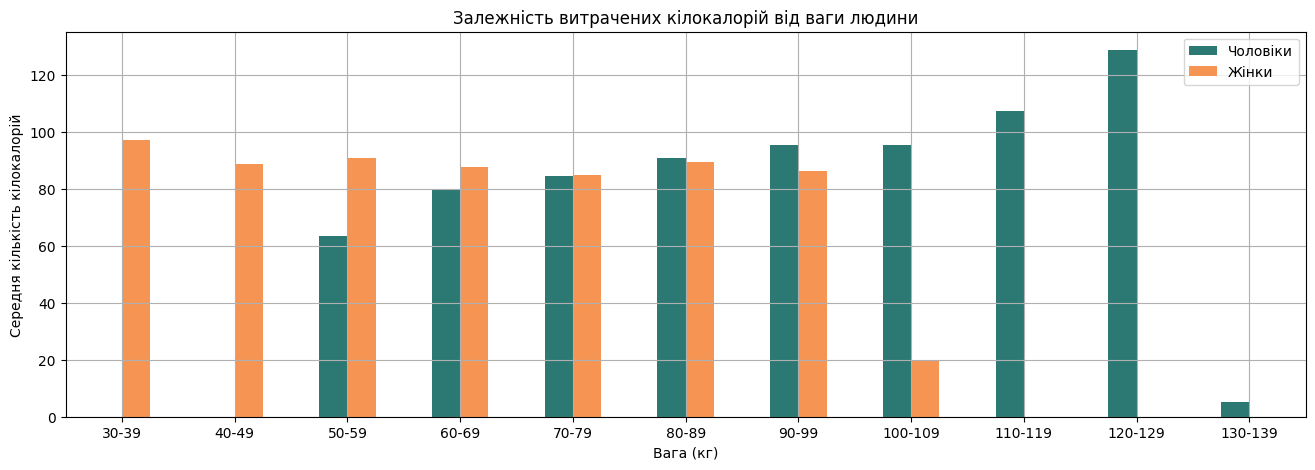

In [17]:
bins = np.arange(30, 150, 10)
labels = [f'{i}-{i+9}' for i in bins[:-1]]

data_analysis['WeightGroup'] = np.digitize(data_analysis['Weight'], bins)
average_calories_by_weight = data_analysis.groupby(['WeightGroup', 'GenderCode'])['Calories'].mean().unstack()

average_calories_by_weight.plot(kind='bar', figsize=(16, 5), ax=plt.gca(), color=['#2C7873', '#F69454'])
plt.xlabel('Вага (кг)')
plt.ylabel('Середня кількість кілокалорій')
plt.title('Залежність витрачених кілокалорій від ваги людини')
plt.legend(['Чоловіки', 'Жінки'])
plt.grid(True)
plt.xticks(ticks=np.arange(len(labels)), labels=labels, rotation=0)
plt.show()

In [18]:
data = pd.read_csv('data_processed.csv')
data

,Gender,GenderCode,Age,Height,Weight,HeartRate,BodyTemp,ExerciseNameENG,ExerciseNameUKR,ExerciseID,Duration,Calories
0,male,0,68,190,94,105,40.8,"Cycling, 16-19 mph, very fast, racing","Велоспорт, 25-30 км/год, дуже швидко",13,29,231
1,female,1,20,166,60,94,40.3,"Stationary cycling, light","Стаціонарний велоспорт, легкий режим",24,14,66
2,male,0,69,179,79,88,38.7,Watering lawn or garden,Полив газону або саду,22,5,26
3,female,1,34,179,71,100,40.5,Unicycling,Їзда на одноколісному велосипеді,17,13,71
4,female,1,27,154,58,81,39.8,"Stationary cycling, very light","Стаціонарний велоспорт, дуже легкий режим",23,10,35
...,...,...,...,...,...,...,...,...,...,...,...,...
14995,female,1,20,193,86,92,40.4,Mild stretching,Легка розтяжка,19,11,45
14996,female,1,27,165,65,85,39.2,Watering lawn or garden,Полив газону або саду,22,6,23
14997,female,1,43,159,58,90,40.1,Walking 4.5 mph,"Ходьба, 7 км/год, дуже швидкий темп",33,16,75
14998,male,0,78,193,97,84,38.3,Watering lawn or garden,Полив газону або саду,22,2,11


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           15000 non-null  object 
 1   GenderCode       15000 non-null  int64  
 2   Age              15000 non-null  int64  
 3   Height           15000 non-null  int64  
 4   Weight           15000 non-null  int64  
 5   HeartRate        15000 non-null  int64  
 6   BodyTemp         15000 non-null  float64
 7   ExerciseNameENG  15000 non-null  object 
 8   ExerciseNameUKR  15000 non-null  object 
 9   ExerciseID       15000 non-null  int64  
 10  Duration         15000 non-null  int64  
 11  Calories         15000 non-null  int64  
dtypes: float64(1), int64(8), object(3)
memory usage: 1.4+ MB


In [20]:
data.isnull().sum()

Gender             0
GenderCode         0
Age                0
Height             0
Weight             0
HeartRate          0
BodyTemp           0
ExerciseNameENG    0
ExerciseNameUKR    0
ExerciseID         0
Duration           0
Calories           0
dtype: int64

In [21]:
data = data.drop(['Gender', 'HeartRate', 'BodyTemp', 'ExerciseNameENG', 'ExerciseNameUKR'], axis=1)
data

,GenderCode,Age,Height,Weight,ExerciseID,Duration,Calories
0,0,68,190,94,13,29,231
1,1,20,166,60,24,14,66
2,0,69,179,79,22,5,26
3,1,34,179,71,17,13,71
4,1,27,154,58,23,10,35
...,...,...,...,...,...,...,...
14995,1,20,193,86,19,11,45
14996,1,27,165,65,22,6,23
14997,1,43,159,58,33,16,75
14998,0,78,193,97,22,2,11


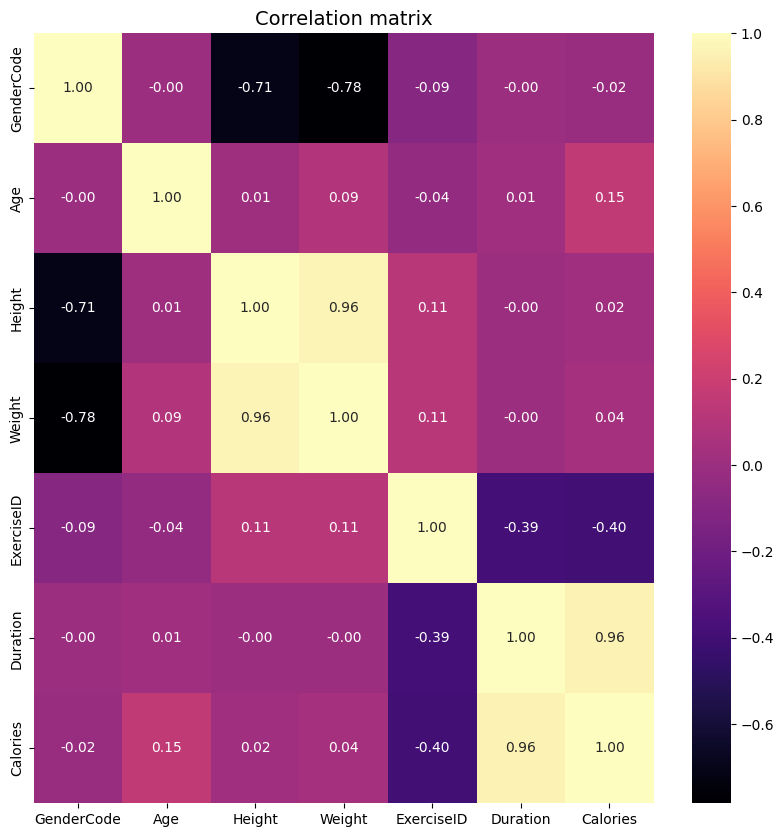

In [22]:
figure, ax = plt.subplots(figsize= [10,10])
sns.heatmap(data.corr(), annot=True, fmt=".2f", ax=ax, cmap = "magma")
ax.set_title("Correlation matrix", fontsize=14)
plt.show()

In [23]:
X = data.drop('Calories', axis=1)
Y = data['Calories']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=30)

In [24]:
models_test = []
models_test.append(('Linear Regression', LinearRegression()))
models_test.append(('Decision Tree Regression', DecisionTreeRegressor(random_state = 30)))
models_test.append(('Gradient Boosting Regression', GradientBoostingRegressor(random_state = 30)))
models_test.append(('Random Forest Regression', RandomForestRegressor(random_state = 30)))
models_test.append(('Support Vector Regression', SVR()))
models_test.append(('K-Nearest Neighbors Regression', KNeighborsRegressor()))

for name, model in models_test:
    start_time = time.time()
    model.fit(X_train, Y_train)
    end_time = time.time()
    Y_pred = model.predict(X_test)
    accuracy_R2 = r2_score(Y_test, Y_pred)
    accuracy_MAE = mean_absolute_error(Y_test, Y_pred)
    accuracy_MSE = mean_squared_error(Y_test, Y_pred)
    print(f"{name}: R2 = {accuracy_R2:.4f}, MAE = {accuracy_MAE:.4f}, MSE = {accuracy_MSE:.4f}, Time = {end_time - start_time:.4f} s.")

Linear Regression: R2 = 0.9366, MAE = 11.9330, MSE = 247.9564, Time = 0.0100 s.
Decision Tree Regression: R2 = 0.9624, MAE = 7.1373, MSE = 146.9427, Time = 0.0313 s.
Gradient Boosting Regression: R2 = 0.9727, MAE = 7.2957, MSE = 106.9339, Time = 0.6293 s.
Random Forest Regression: R2 = 0.9823, MAE = 5.3253, MSE = 69.4266, Time = 2.6094 s.
Support Vector Regression: R2 = 0.8632, MAE = 15.7230, MSE = 535.3049, Time = 4.1943 s.
K-Nearest Neighbors Regression: R2 = 0.9616, MAE = 8.8545, MSE = 150.2223, Time = 0.0000 s.


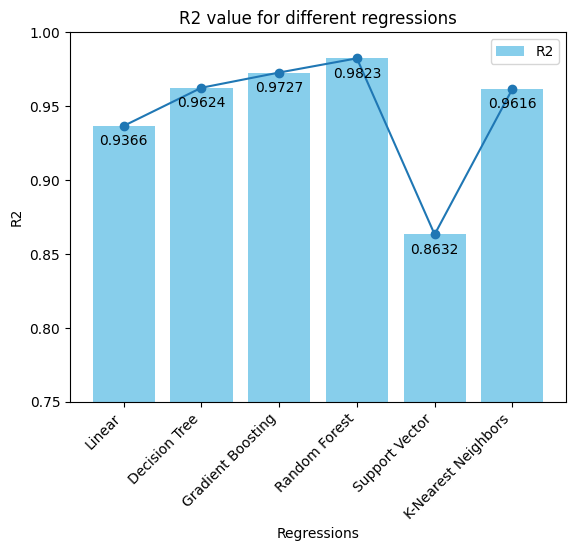

In [25]:
values = [0.9366, 0.9624, 0.9727, 0.9823, 0.8632, 0.9616]

x = np.arange(len(values))

fig, ax = plt.subplots()

ax.set_ylim(0.75, 1.00)
ax.bar(x, values, color='skyblue', label='R2')
ax.plot(x, values, marker='o')

for i, v in enumerate(values):
    ax.text(x[i], v - 0.015, str(v), ha='center', va='bottom', color='black')

column_names = ['Linear', 'Decision Tree', 'Gradient Boosting', 'Random Forest', 'Support Vector', 'K-Nearest Neighbors']
ax.set_xticks(x)
ax.set_xticklabels(column_names, rotation=45, ha='right')

ax.set_xlabel('Regressions')
ax.set_ylabel('R2')
ax.set_title('R2 value for different regressions')
ax.legend()

plt.show()

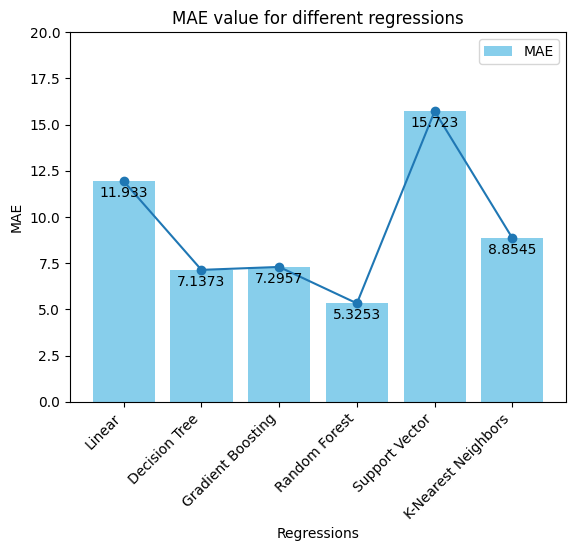

In [26]:
values = [11.9330, 7.1373, 7.2957, 5.3253, 15.7230, 8.8545]

x = np.arange(len(values))

fig, ax = plt.subplots()

ax.set_ylim(0, 20)
ax.bar(x, values, color='skyblue', label='MAE')
ax.plot(x, values, marker='o')

for i, v in enumerate(values):
    ax.text(x[i], v - 1, str(v), ha='center', va='bottom', color='black')

column_names = ['Linear', 'Decision Tree', 'Gradient Boosting', 'Random Forest', 'Support Vector', 'K-Nearest Neighbors']
ax.set_xticks(x)
ax.set_xticklabels(column_names, rotation=45, ha='right')

ax.set_xlabel('Regressions')
ax.set_ylabel('MAE')
ax.set_title('MAE value for different regressions')
ax.legend()

plt.show()

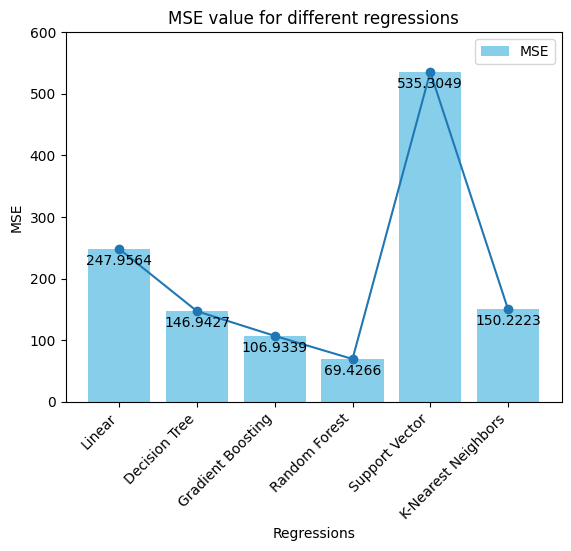

In [27]:
values = [247.9564, 146.9427, 106.9339, 69.4266, 535.3049, 150.2223]

x = np.arange(len(values))

fig, ax = plt.subplots()

ax.set_ylim(0, 600)
ax.bar(x, values, color='skyblue', label='MSE')
ax.plot(x, values, marker='o')

for i, v in enumerate(values):
    ax.text(x[i], v - 30, str(v), ha='center', va='bottom', color='black')

column_names = ['Linear', 'Decision Tree', 'Gradient Boosting', 'Random Forest', 'Support Vector', 'K-Nearest Neighbors']
ax.set_xticks(x)
ax.set_xticklabels(column_names, rotation=45, ha='right')

ax.set_xlabel('Regressions')
ax.set_ylabel('MSE')
ax.set_title('MSE value for different regressions')
ax.legend()

plt.show()

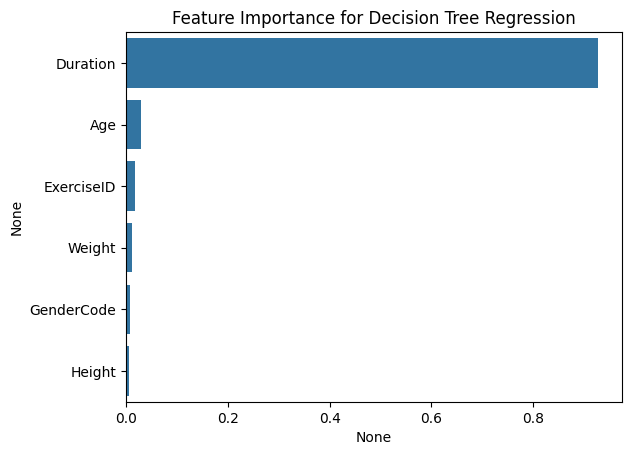

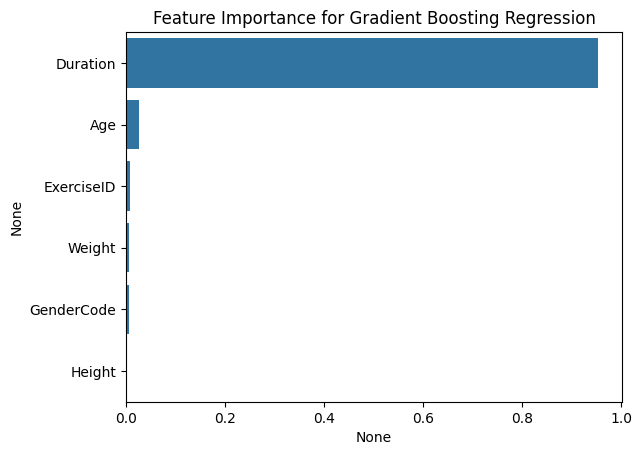

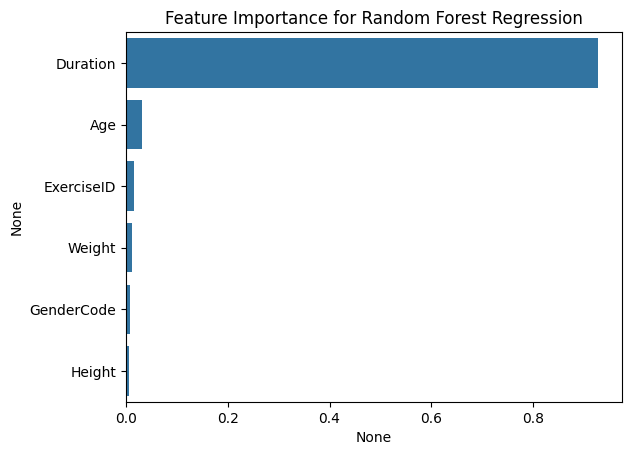

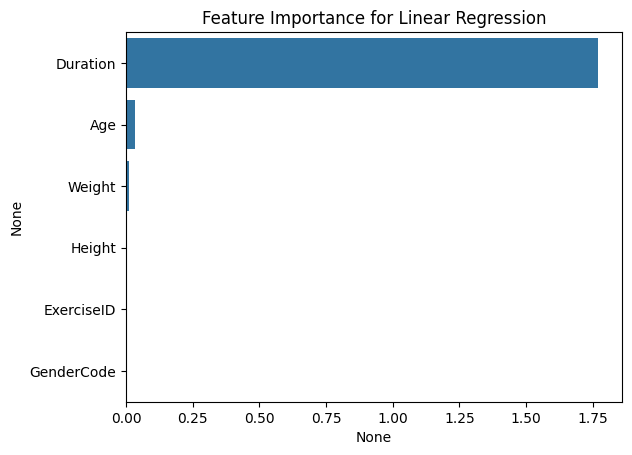

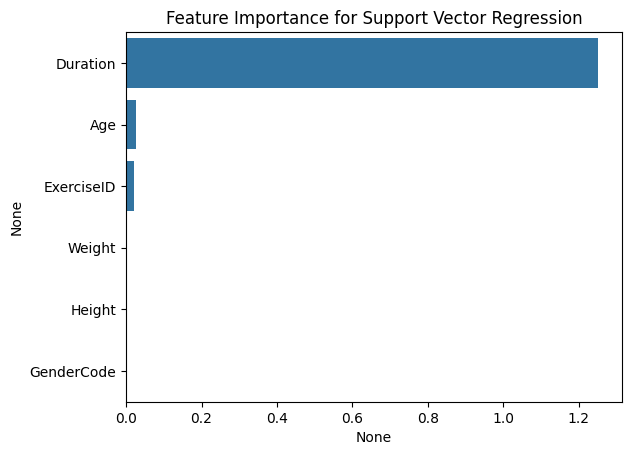

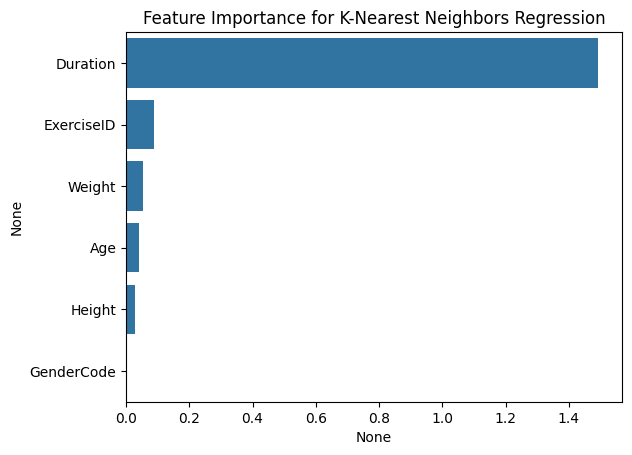

In [28]:
models_imp = [
    ('Decision Tree Regression', DecisionTreeRegressor(random_state=30)),
    ('Gradient Boosting Regression', GradientBoostingRegressor(random_state=30)),
    ('Random Forest Regression', RandomForestRegressor(random_state=30)),
    ('Linear Regression', LinearRegression()),
    ('Support Vector Regression', SVR()),
    ('K-Nearest Neighbors Regression', KNeighborsRegressor())
]

for name, model in models_imp:
    base = model.fit(X_train, Y_train)
    Y_pred = base.predict(X_test)
    
    # For models with feature_importances_
    if hasattr(base, 'feature_importances_'):
        feature_imp = pd.Series(base.feature_importances_, index=X.columns).sort_values(ascending=False)
        sns.barplot(x=feature_imp, y=feature_imp.index)
        plt.title(f"Feature Importance for {name}")
        plt.show()
    
    # For models without feature_importances_
    else:
        result = permutation_importance(base, X_test, Y_test, n_repeats=10, random_state=45)
        importance = pd.Series(result.importances_mean, index=X.columns).sort_values(ascending=False)
        sns.barplot(x=importance, y=importance.index)
        plt.title(f"Feature Importance for {name}")
        plt.show()

In [29]:
model_RFR = RandomForestRegressor(n_estimators=200, max_depth=20, max_features='sqrt', min_samples_leaf=4, random_state=30)
model_RFR.fit(X_train, Y_train)
Y_pred = model_RFR.predict(X_test)
r2s = r2_score(Y_test, Y_pred)
mses = mean_squared_error(Y_test, Y_pred)
maes = mean_absolute_error(Y_test, Y_pred)
print('R2 of Random Forest Regressor Model =', r2s)
print('Mean Squared Error of Random Forest Regressor Model =', mses)
print('Mean Absolute Error of Random Forest Regressor Model =', maes)

R2 of Random Forest Regressor Model = 0.9849033935126035
Mean Squared Error of Random Forest Regressor Model = 59.05235690828764
Mean Absolute Error of Random Forest Regressor Model = 5.149983579631845


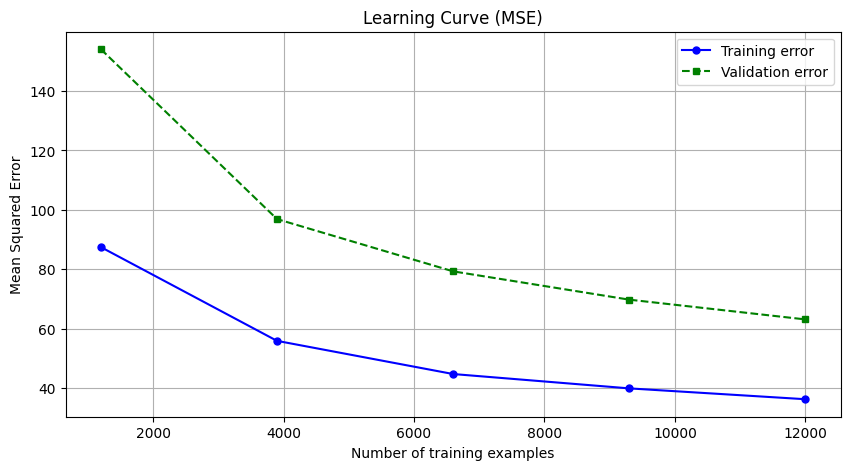

In [30]:
train_sizes, train_scores, test_scores = learning_curve(model_RFR, X, Y, cv=5, scoring='neg_mean_squared_error')

train_scores = np.abs(train_scores)
test_scores = np.abs(test_scores)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(10, 5))
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training error')
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation error')

plt.title('Learning Curve (MSE)')
plt.xlabel('Number of training examples')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid(True)
plt.show()

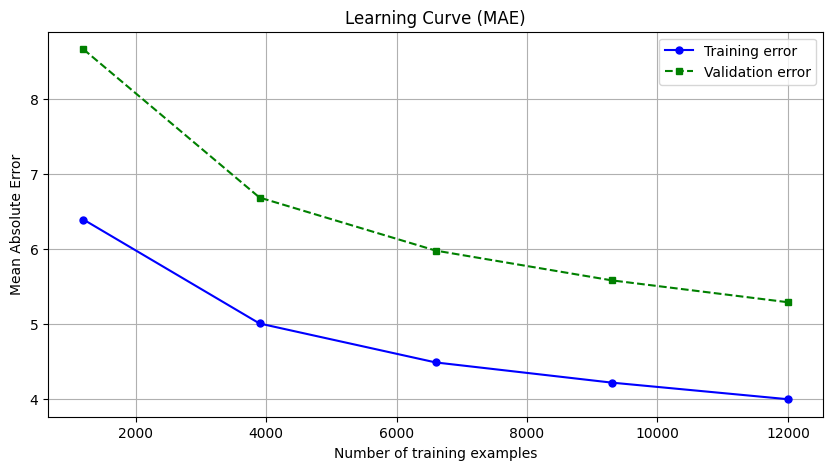

In [31]:
train_sizes, train_scores, test_scores = learning_curve(model_RFR, X, Y, cv=5, scoring='neg_mean_absolute_error')

train_scores = np.abs(train_scores)
test_scores = np.abs(test_scores)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(10, 5))
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training error')
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation error')

plt.title('Learning Curve (MAE)')
plt.xlabel('Number of training examples')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.grid(True)
plt.show()